In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics import gofplots

from scipy.stats import ttest_ind

In [34]:
df = pd.read_parquet('../data/null_filtered_sampled_data_2020_2019_02_03_04.parquet')

df_2019 = df[df['year'] == 2019]
df_2020 = df[df['year'] == 2020]

In [4]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,trip_duration
1,2019-02-06 10:01:07,2019-02-06 10:05:03,1.0,0.54,263,236,1,4.5,0.0,0.5,1.56,0.0,0.3,9.36,2,2019,3.933333
2,2019-02-11 12:37:17,2019-02-11 12:47:41,2.0,1.41,236,75,1,8.5,0.0,0.5,2.36,0.0,0.3,14.16,2,2019,10.400000
3,2019-02-19 22:37:11,2019-02-19 22:47:26,1.0,2.10,164,141,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2,2019,10.250000
4,2019-02-21 15:31:37,2019-02-21 15:54:16,1.0,3.26,249,87,1,16.5,1.0,0.5,4.16,0.0,0.3,24.96,2,2019,22.650000
6,2019-02-01 00:58:37,2019-02-01 00:59:32,1.0,0.27,170,170,1,3.0,0.5,0.5,1.29,0.0,0.3,5.59,2,2019,0.916667


### Number of taxis per day analysis

/tmp/ipykernel_6815/3075401799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['tpep_pickup_datetime'] = pd.to_datetime(df_2019['tpep_pickup_datetime'])


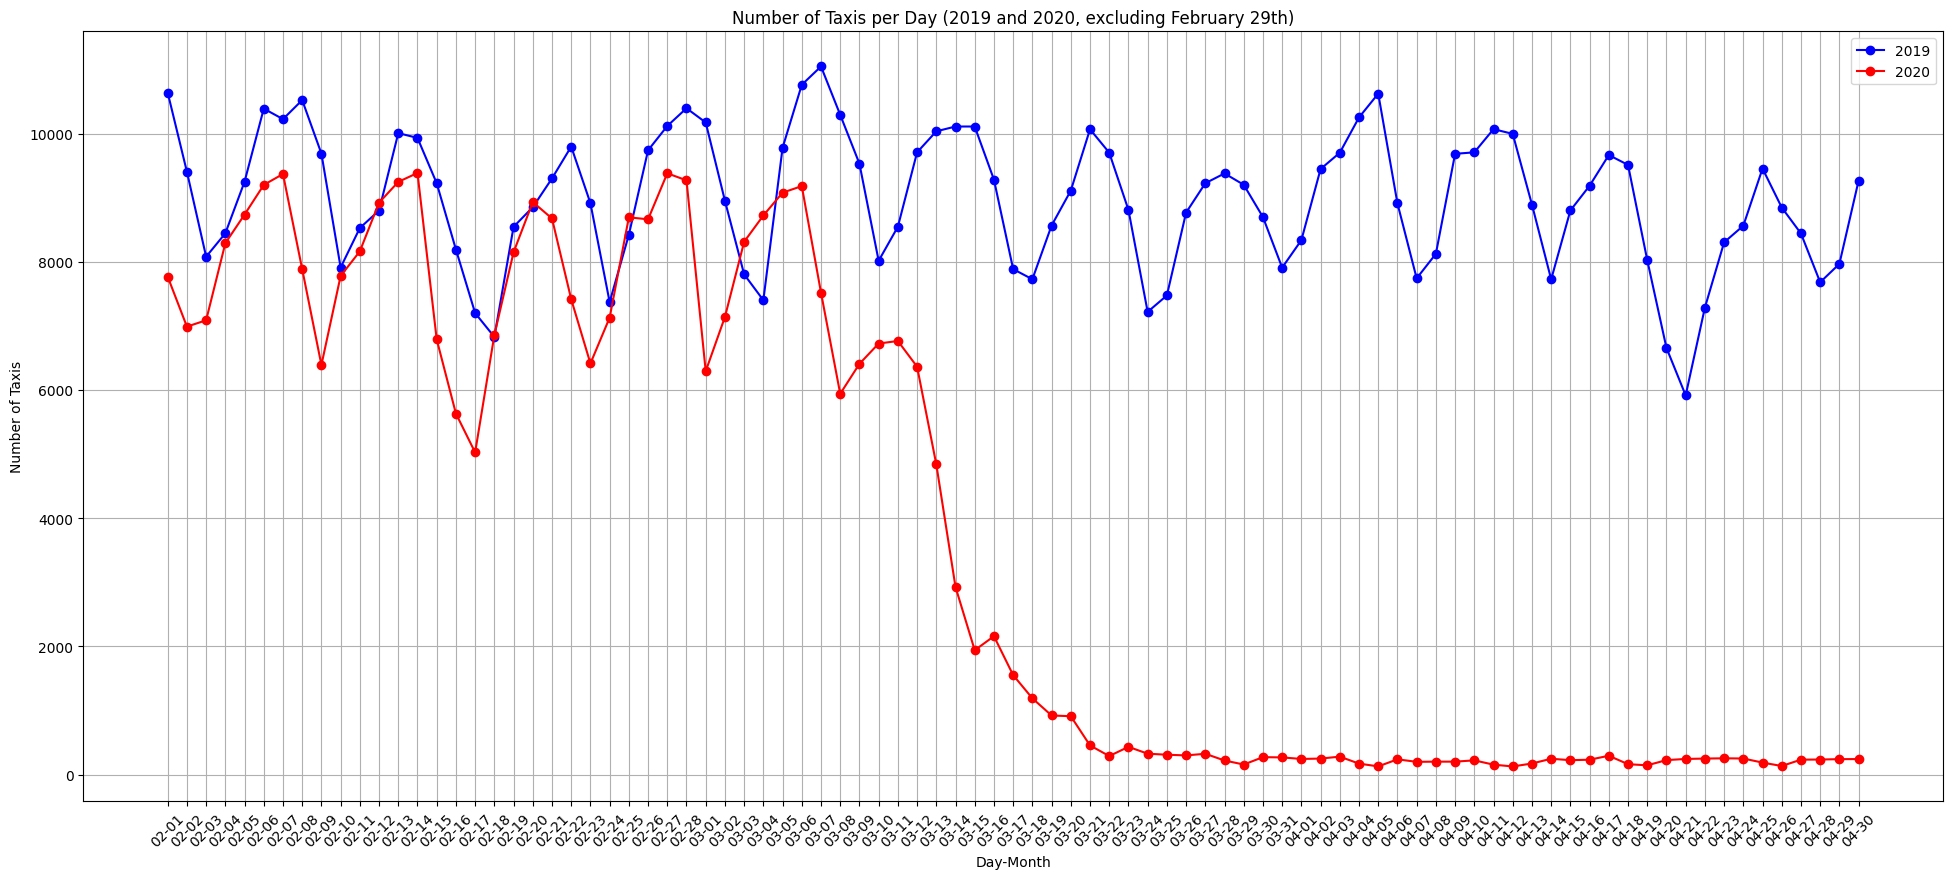

In [52]:
# Assuming df_2019 and df_2020 are your DataFrames with 'tpep_pickup_datetime' columns
df_2019['tpep_pickup_datetime'] = pd.to_datetime(df_2019['tpep_pickup_datetime'])
daily_counts_2019 = df_2019['tpep_pickup_datetime'].dt.strftime('%m-%d').value_counts().sort_index()

df_2020['tpep_pickup_datetime'] = pd.to_datetime(df_2020['tpep_pickup_datetime'])
# Remove data corresponding to February 29th
df_2020 = df_2020[~((df_2020['tpep_pickup_datetime'].dt.month == 2) & (df_2020['tpep_pickup_datetime'].dt.day == 29))]
daily_counts_2020 = df_2020['tpep_pickup_datetime'].dt.strftime('%m-%d').value_counts().sort_index()

# Plot the data for 2019
plt.figure(figsize=(24, 10))
plt.plot(daily_counts_2019.index, daily_counts_2019.values, marker='o', linestyle='-', color='b', label='2019')

# Plot the data for 2020 on top of 2019
plt.plot(daily_counts_2020.index, daily_counts_2020.values, marker='o', linestyle='-', color='r', label='2020')

plt.title('Number of Taxis per Day (2019 and 2020, excluding February 29th)')
plt.xlabel('Day-Month')
plt.ylabel('Number of Taxis')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()



In [45]:
daily_counts_2020[daily_counts_2020 == '02-29']

Series([], Name: count, dtype: int64)

In [43]:
[day for day in daily_counts_2020.index if day not in daily_counts_2019.index]

['02-29']

In [17]:
df_2020['tpep_pickup_datetime'].max()

Timestamp('2020-04-30 22:50:53')

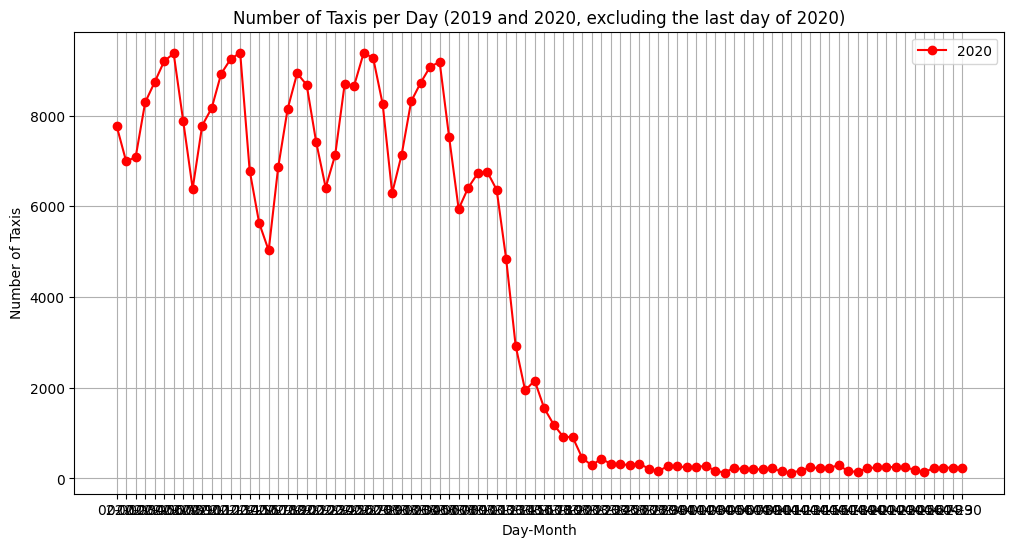

In [15]:
# Plot the data for 2019
plt.figure(figsize=(12, 6))
# Plot the data for 2020 on top of 2019
plt.plot(daily_counts_2020.index, daily_counts_2020.values, marker='o', linestyle='-', color='r', label='2020')

plt.title('Number of Taxis per Day (2019 and 2020, excluding the last day of 2020)')
plt.xlabel('Day-Month')
plt.ylabel('Number of Taxis')
plt.grid(True)
plt.legend()
plt.show()

### Trip duration analysis 

In [5]:
df_2019.shape

(798835, 17)

In [6]:
df_2020.shape

(345143, 17)

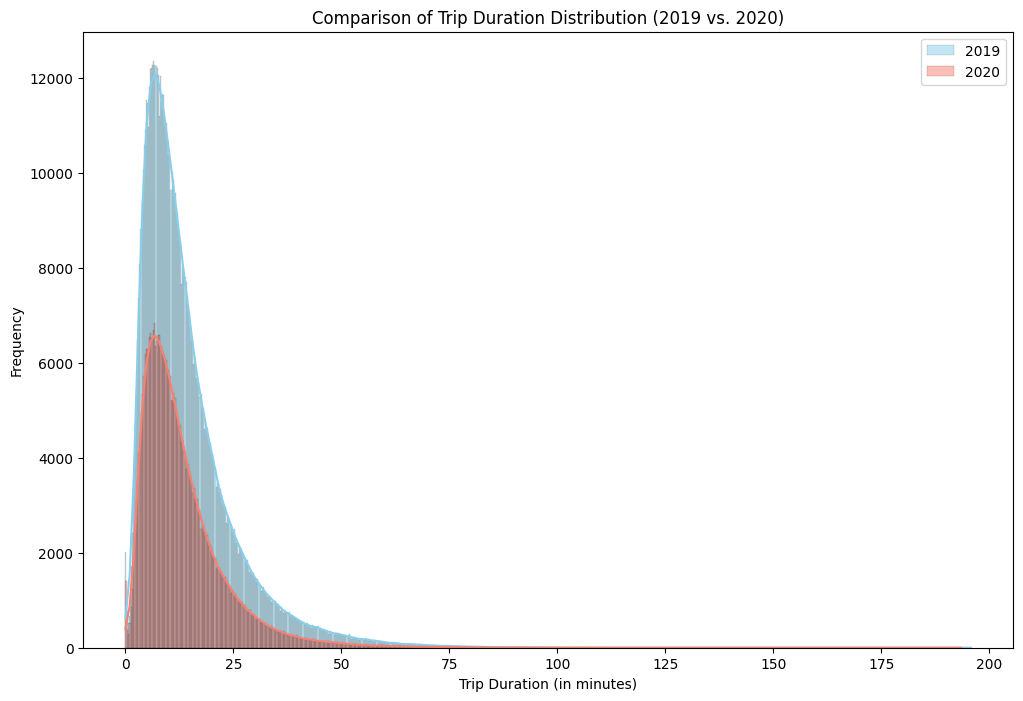

In [13]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram for 2019
sns.histplot(df_2019[df_2019['trip_duration']<200]['trip_duration'], kde=True, color='skyblue', label='2019', ax=ax)

# Plot the histogram for 2020
sns.histplot(df_2020[df_2020['trip_duration']<200]['trip_duration'], kde=True, color='salmon', label='2020', ax=ax)

ax.set_xlabel('Trip Duration (in minutes)')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Trip Duration Distribution (2019 vs. 2020)')

ax.legend()
plt.show()

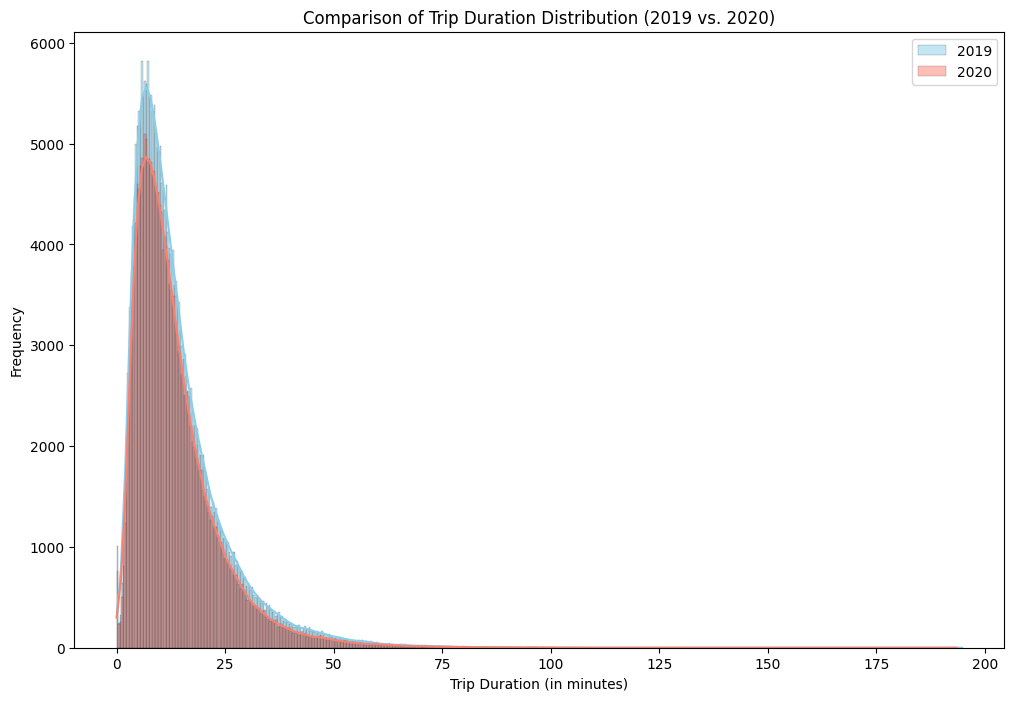

In [59]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram for 2019
sns.histplot(df_2019[(df_2019['trip_duration']<200) & (df_2019['month'].isin([2]))]['trip_duration'], kde=True, color='skyblue', label='2019', ax=ax)

# Plot the histogram for 2020
sns.histplot(df_2020[(df_2020['trip_duration']<200) & (df_2020['month'].isin([2]))]['trip_duration'], kde=True, color='salmon', label='2020', ax=ax)

ax.set_xlabel('Trip Duration (in minutes)')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Trip Duration Distribution (2019 vs. 2020)')

ax.legend()
plt.show()

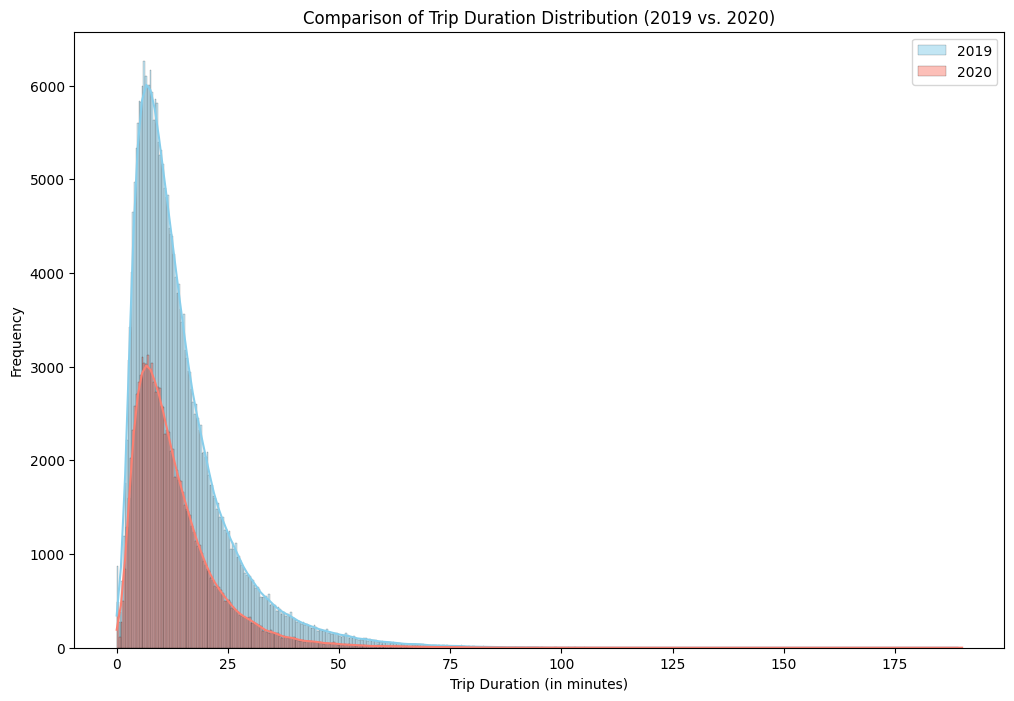

In [60]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram for 2019
sns.histplot(df_2019[(df_2019['trip_duration']<200) & (df_2019['month'].isin([3]))]['trip_duration'], kde=True, color='skyblue', label='2019', ax=ax)

# Plot the histogram for 2020
sns.histplot(df_2020[(df_2020['trip_duration']<200) & (df_2020['month'].isin([3]))]['trip_duration'], kde=True, color='salmon', label='2020', ax=ax)

ax.set_xlabel('Trip Duration (in minutes)')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Trip Duration Distribution (2019 vs. 2020)')

ax.legend()
plt.show()

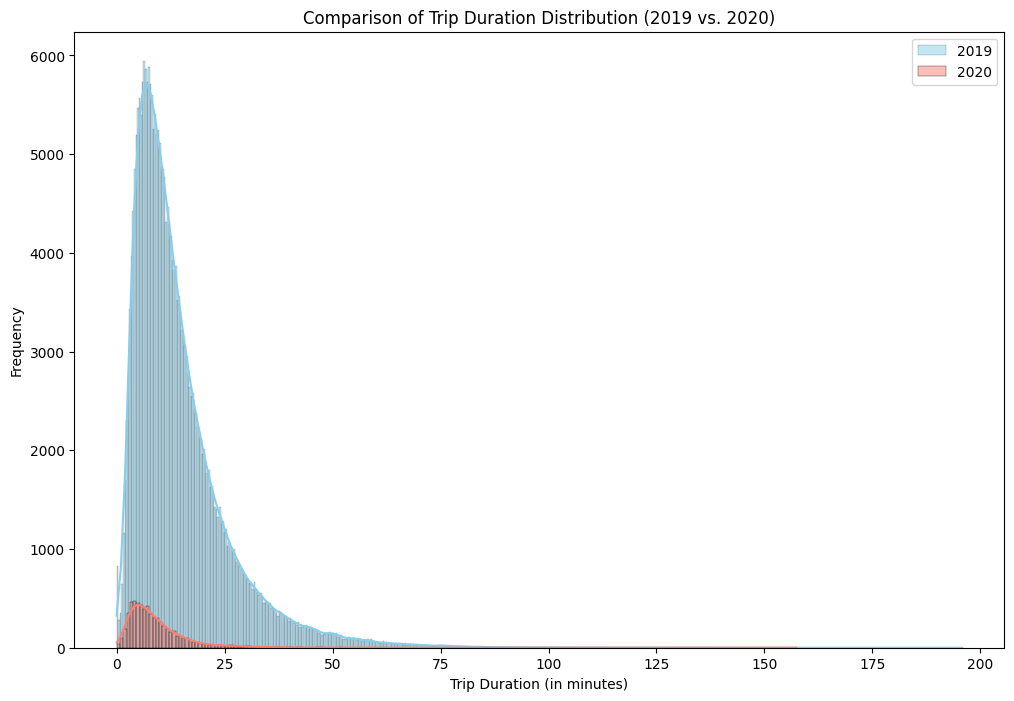

In [62]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram for 2019
sns.histplot(df_2019[(df_2019['trip_duration']<200) & (df_2019['month'].isin([4]))]['trip_duration'], kde=True, color='skyblue', label='2019', ax=ax)

# Plot the histogram for 2020
sns.histplot(df_2020[(df_2020['trip_duration']<200) & (df_2020['month'].isin([4]))]['trip_duration'], kde=True, color='salmon', label='2020', ax=ax)

ax.set_xlabel('Trip Duration (in minutes)')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Trip Duration Distribution (2019 vs. 2020)')

ax.legend()
plt.show()

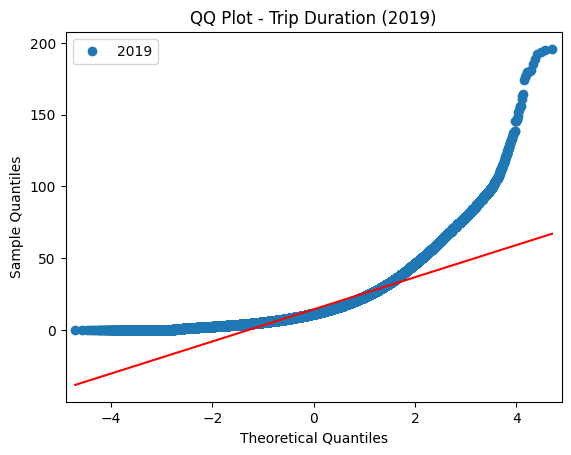

In [8]:
#hacer qqplot de 2020 vs 2019 para ver que ta parecidas son las distribuciones. 

# Create QQ plot
fig, ax = plt.subplots()
gofplots.qqplot(df_2019[df_2019['trip_duration']<200]['trip_duration'], line='s', ax=ax, label='2019')
ax.set_title('QQ Plot - Trip Duration (2019)')
ax.legend()
plt.show()


/home/octadesh/POSTGRADO_IA/analisis_datos/CEIA_Analisis_de_datos/.venv/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


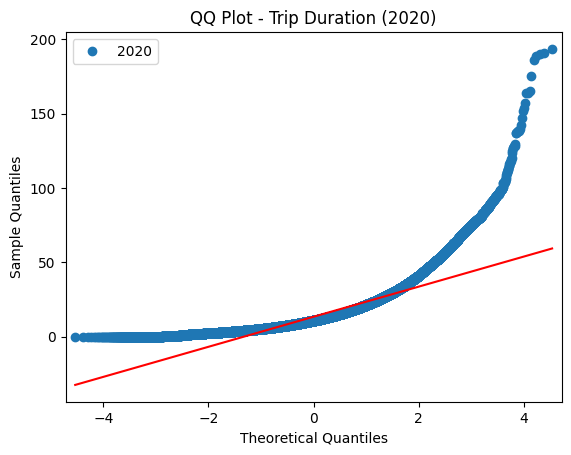

In [9]:
# Create QQ plot
fig, ax = plt.subplots()
gofplots.qqplot(df_2020[df_2020['trip_duration']<200]['trip_duration'], line='s', ax=ax, label='2020', color='red')
ax.set_title('QQ Plot - Trip Duration (2020)')
ax.legend()
plt.show()

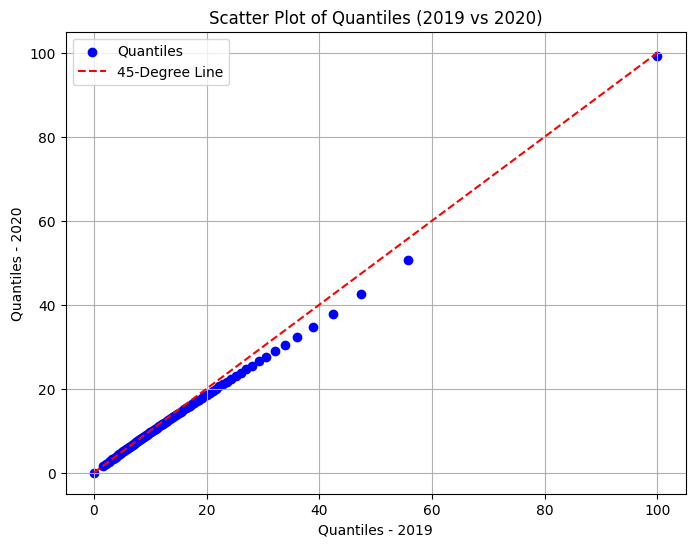

In [10]:
quantiles_2019 = np.percentile(df_2019[df_2019['trip_duration']<100]['trip_duration'], np.linspace(0, 100, 100))
quantiles_2020 = np.percentile(df_2020[df_2020['trip_duration']<100]['trip_duration'], np.linspace(0, 100, 100))

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(quantiles_2019, quantiles_2020, color='blue', label='Quantiles')
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='45-Degree Line')  # 45-degree reference line
plt.title('Scatter Plot of Quantiles (2019 vs 2020)')
plt.xlabel('Quantiles - 2019')
plt.ylabel('Quantiles - 2020')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
#Estimamos momentos de las distribuciones

print("2019 media: ", df_2019[df_2019['trip_duration']<120]['trip_duration'].mean())
print("2020 media: ", df_2020[df_2020['trip_duration']<120]['trip_duration'].mean())

print("2019 Skewness: ", df_2019[df_2019['trip_duration']<120]['trip_duration'].skew())
print("2020 Skewness: ", df_2020[df_2020['trip_duration']<120]['trip_duration'].skew())

print("2019 Kurtosis value for trip duration: ", df_2019[df_2019['trip_duration']<120]['trip_duration'].kurtosis())
print("2020 Kurtosis value for trip duration: ", df_2020[df_2020['trip_duration']<120]['trip_duration'].kurtosis())

2019 media:  14.364815365598078
2020 media:  13.416880303115917
2019 Skewness:  2.06749279388933
2020 Skewness:  2.1524895992349173
2019 Kurtosis value for trip duration:  6.427224251599906
2020 Kurtosis value for trip duration:  7.607799516435602


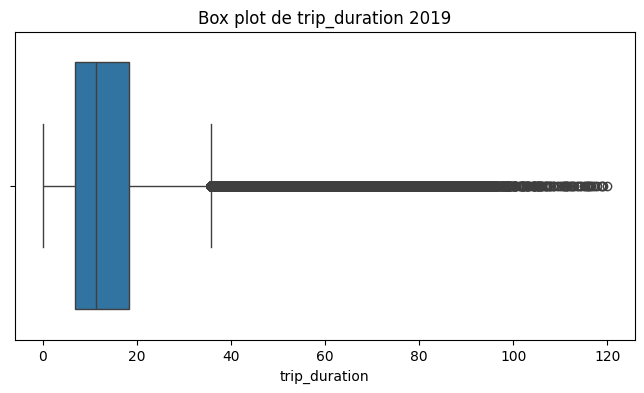

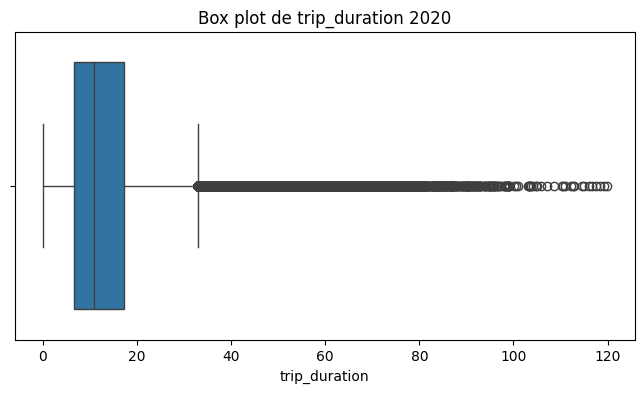

In [54]:
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico según necesidad
sns.boxplot(x=df_2019[df_2019['trip_duration']<120]['trip_duration'])
plt.title(f"Box plot de trip_duration 2019")
plt.show()

plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico según necesidad
sns.boxplot(x=df_2020[df_2020['trip_duration']<120]['trip_duration'])
plt.title(f"Box plot de trip_duration 2020")
plt.show()

In [55]:
# Extract the trip_duration columns from both DataFrames
trip_duration_2019 = df_2019[df_2019['trip_duration']<60]['trip_duration']
trip_duration_2020 = df_2020[df_2020['trip_duration']<60]['trip_duration']

# Perform the independent two-sample t-test
statistic, p_value = ttest_ind(trip_duration_2019, trip_duration_2020, equal_var=False)

# Print the results
print(f"t-statistic: {statistic}")
print(f"P-value: {p_value}")

# Define a significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in trip durations between 2019 and 2020.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in trip durations between 2019 and 2020.")

t-statistic: 44.35086742301936
P-value: 0.0
Reject the null hypothesis: There is a significant difference in trip durations between 2019 and 2020.


### Trip Pick up time analysis. 

In [17]:
# Create a new column with only the time part
df_2019['pickup_time'] = df_2019['tpep_pickup_datetime'].dt.time
df_2020['pickup_time'] = df_2020['tpep_pickup_datetime'].dt.time

/tmp/ipykernel_5303/2476188433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['pickup_time'] = df_2019['tpep_pickup_datetime'].dt.time
/tmp/ipykernel_5303/2476188433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['pickup_time'] = df_2020['tpep_pickup_datetime'].dt.time


In [18]:
# Convert the 'pickup_time' column to total seconds
df_2019['pickup_seconds'] = df_2019['pickup_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second + x.microsecond / 1e6)

# Calculate the mean of the total seconds
mean_pickup_seconds = df_2019['pickup_seconds'].mean()

# Convert the mean back to a time object
mean_pickup_time = pd.to_datetime(mean_pickup_seconds, unit='s').time()

mean_pickup_time


/tmp/ipykernel_5303/2335483648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['pickup_seconds'] = df_2019['pickup_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second + x.microsecond / 1e6)


datetime.time(14, 30, 4, 145264)

In [19]:
# Convert the 'pickup_time' column to total seconds
df_2020['pickup_seconds'] = df_2020['pickup_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second + x.microsecond / 1e6)

# Calculate the mean of the total seconds
mean_pickup_seconds = df_2020['pickup_seconds'].mean()

# Convert the mean back to a time object
mean_pickup_time = pd.to_datetime(mean_pickup_seconds, unit='s').time()

mean_pickup_time

/tmp/ipykernel_5303/1212187421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['pickup_seconds'] = df_2020['pickup_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second + x.microsecond / 1e6)


datetime.time(14, 28, 53, 959025)

/tmp/ipykernel_5303/2330843013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['pickup_hour'] = df_2019['pickup_seconds']/3600
/tmp/ipykernel_5303/2330843013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['pickup_hour'] = df_2020['pickup_seconds']/3600


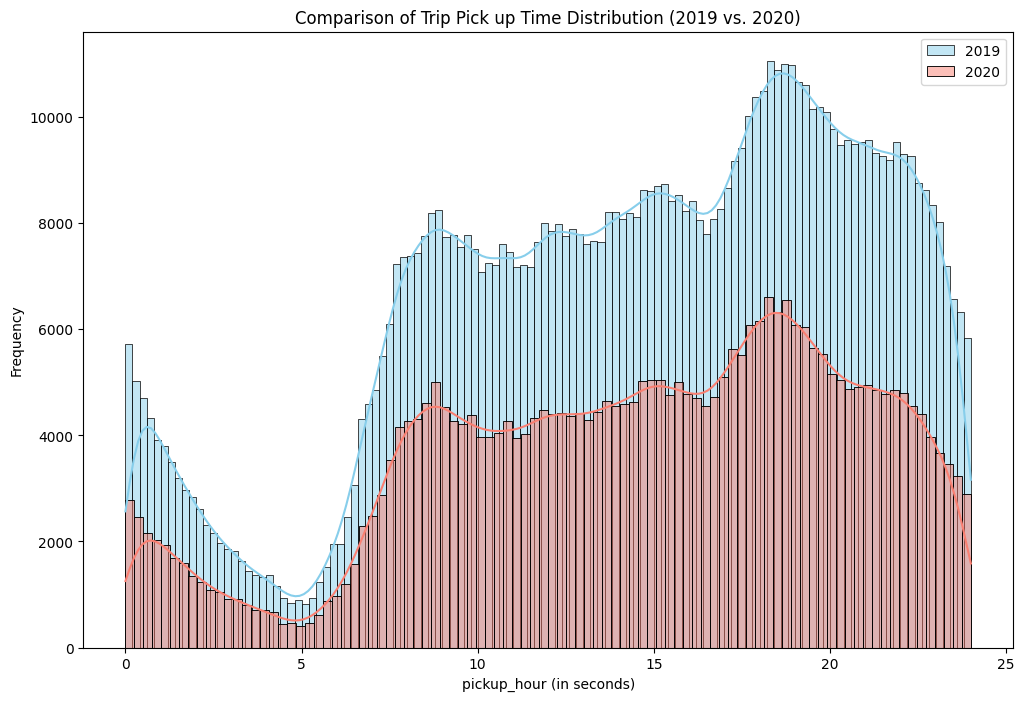

In [20]:
df_2019['pickup_hour'] = df_2019['pickup_seconds']/3600
df_2020['pickup_hour'] = df_2020['pickup_seconds']/3600

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram for 2019
sns.histplot(df_2019['pickup_hour'], kde=True, color='skyblue', label='2019', ax=ax)

# Plot the histogram for 2020
sns.histplot(df_2020['pickup_hour'], kde=True, color='salmon', label='2020', ax=ax)

ax.set_xlabel('pickup_hour (in seconds)')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Trip Pick up Time Distribution (2019 vs. 2020)')

ax.legend()
plt.show()

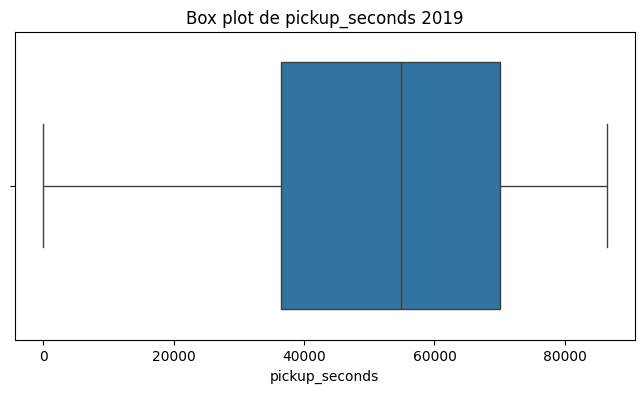

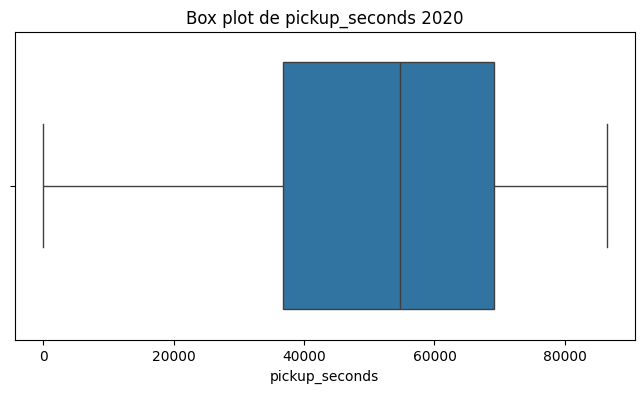

In [21]:
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico según necesidad
sns.boxplot(x=df_2019['pickup_seconds'])
plt.title(f"Box plot de pickup_seconds 2019")
plt.show()

plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico según necesidad
sns.boxplot(x=df_2020['pickup_seconds'])
plt.title(f"Box plot de pickup_seconds 2020")
plt.show()

### Drop off time analysis

In [22]:
df_2019

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,trip_duration,pickup_time,pickup_seconds,pickup_hour
1,2019-02-06 10:01:07,2019-02-06 10:05:03,1.0,0.54,263,236,1,4.5,0.0,0.5,1.56,0.0,0.3,9.36,2,2019,3.933333,10:01:07,36067.0,10.018611
2,2019-02-11 12:37:17,2019-02-11 12:47:41,2.0,1.41,236,75,1,8.5,0.0,0.5,2.36,0.0,0.3,14.16,2,2019,10.400000,12:37:17,45437.0,12.621389
3,2019-02-19 22:37:11,2019-02-19 22:47:26,1.0,2.10,164,141,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2,2019,10.250000,22:37:11,81431.0,22.619722
4,2019-02-21 15:31:37,2019-02-21 15:54:16,1.0,3.26,249,87,1,16.5,1.0,0.5,4.16,0.0,0.3,24.96,2,2019,22.650000,15:31:37,55897.0,15.526944
6,2019-02-01 00:58:37,2019-02-01 00:59:32,1.0,0.27,170,170,1,3.0,0.5,0.5,1.29,0.0,0.3,5.59,2,2019,0.916667,00:58:37,3517.0,0.976944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119586,2019-04-06 11:24:10,2019-04-06 11:32:27,1.0,0.77,236,140,1,6.5,0.0,0.5,5.00,0.0,0.3,14.80,4,2019,8.283333,11:24:10,41050.0,11.402778
1119590,2019-04-07 08:28:03,2019-04-07 08:31:25,1.0,1.07,263,141,1,5.0,0.0,0.5,2.08,0.0,0.3,10.38,4,2019,3.366667,08:28:03,30483.0,8.467500
1119592,2019-04-27 12:37:50,2019-04-27 13:04:00,1.0,5.29,186,87,1,22.0,0.0,0.5,5.06,0.0,0.3,30.36,4,2019,26.166667,12:37:50,45470.0,12.630556
1119593,2019-04-19 08:54:46,2019-04-19 09:08:58,1.0,2.37,170,236,1,11.5,0.0,0.5,2.96,0.0,0.3,17.76,4,2019,14.200000,08:54:46,32086.0,8.912778


In [23]:
df_2019['dropoff_time'] = df_2019['tpep_dropoff_datetime'].dt.time
df_2020['dropoff_time'] = df_2020['tpep_dropoff_datetime'].dt.time

/tmp/ipykernel_5303/1056558960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['dropoff_time'] = df_2019['tpep_dropoff_datetime'].dt.time
/tmp/ipykernel_5303/1056558960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['dropoff_time'] = df_2020['tpep_dropoff_datetime'].dt.time


In [24]:
# Convert the 'pickup_time' column to total seconds
df_2019['dropoff_seconds'] = df_2019['dropoff_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second + x.microsecond / 1e6)

# Calculate the mean of the total seconds
mean_dropoff_seconds = df_2019['dropoff_seconds'].mean()

# Convert the mean back to a time object
mean_dropoff_time = pd.to_datetime(mean_dropoff_seconds, unit='s').time()

mean_dropoff_time

/tmp/ipykernel_5303/2065821365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['dropoff_seconds'] = df_2019['dropoff_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second + x.microsecond / 1e6)


datetime.time(14, 32, 3, 472718)

In [25]:
# Convert the 'pickup_time' column to total seconds
df_2020['dropoff_seconds'] = df_2020['dropoff_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second + x.microsecond / 1e6)

# Calculate the mean of the total seconds
mean_dropoff_seconds = df_2020['dropoff_seconds'].mean()

# Convert the mean back to a time object
mean_dropoff_time = pd.to_datetime(mean_dropoff_seconds, unit='s').time()

mean_dropoff_time

/tmp/ipykernel_5303/1227174930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['dropoff_seconds'] = df_2020['dropoff_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second + x.microsecond / 1e6)


datetime.time(14, 32, 7, 920065)

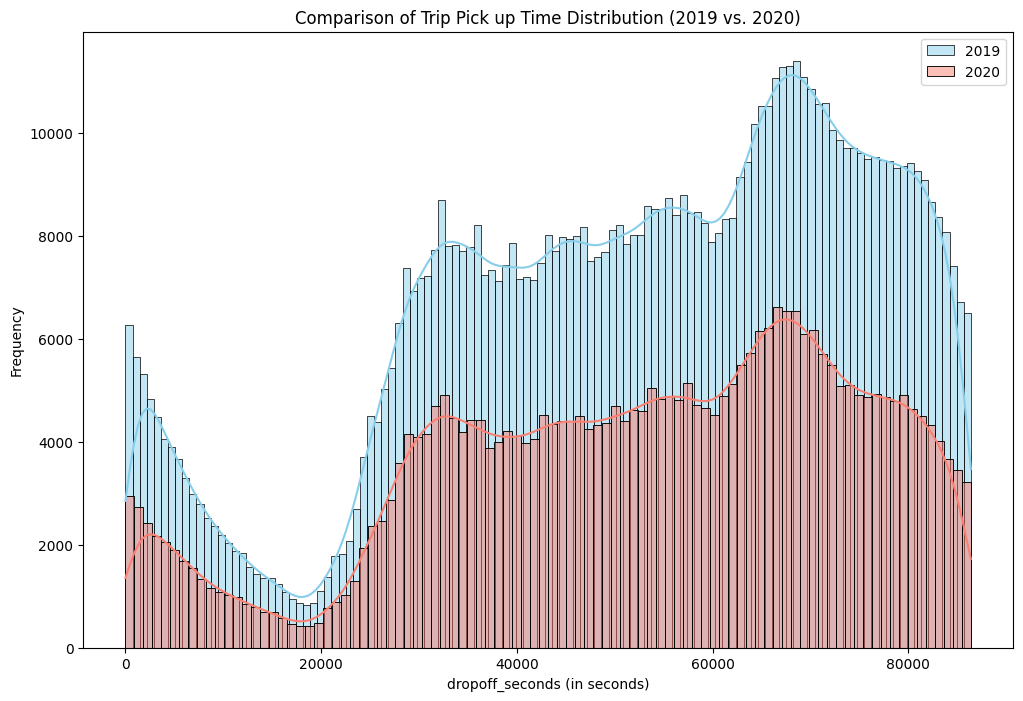

In [26]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram for 2019
sns.histplot(df_2019['dropoff_seconds'], kde=True, color='skyblue', label='2019', ax=ax)

# Plot the histogram for 2020
sns.histplot(df_2020['dropoff_seconds'], kde=True, color='salmon', label='2020', ax=ax)

ax.set_xlabel('dropoff_seconds (in seconds)')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Trip Pick up Time Distribution (2019 vs. 2020)')

ax.legend()
plt.show()

A simple vista, se observa que tanto para pickup como dropoff time tienen una distribucion con una forma similar a lo largo del dia pero con frecuencias menores para el año 2020 que para el año 2019. Al calcular las medias para ambos años los resultados dan casi identicos, lo que sugiere que no ha habido un cambio en estas variables con la pandemia. 

Por el otro lado, se observa que en los horarios diurnos la disminucion en la cantidad de taxis tomados aparenta ser menor que en los nocturnos. Para testear esto agregamos una columna mas al dataset que sera pickup_hour con valores de 0 a 23:



In [27]:
# Convert the 'pickup_time' column to total seconds
df['pickup_time'] = df['tpep_pickup_datetime'].dt.time
df['pickup_seconds'] = df['pickup_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second + x.microsecond / 1e6)

df['pickup_hour'] = df['pickup_seconds']/3600
df['pickup_hour'] = df['pickup_hour'].astype(int)

df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,trip_duration,pickup_time,pickup_seconds,pickup_hour
1,2019-02-06 10:01:07,2019-02-06 10:05:03,1.0,0.54,263,236,1,4.5,0.0,0.5,1.56,0.0,0.3,9.36,2,2019,3.933333,10:01:07,36067.0,10
2,2019-02-11 12:37:17,2019-02-11 12:47:41,2.0,1.41,236,75,1,8.5,0.0,0.5,2.36,0.0,0.3,14.16,2,2019,10.400000,12:37:17,45437.0,12
3,2019-02-19 22:37:11,2019-02-19 22:47:26,1.0,2.10,164,141,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2,2019,10.250000,22:37:11,81431.0,22
4,2019-02-21 15:31:37,2019-02-21 15:54:16,1.0,3.26,249,87,1,16.5,1.0,0.5,4.16,0.0,0.3,24.96,2,2019,22.650000,15:31:37,55897.0,15
6,2019-02-01 00:58:37,2019-02-01 00:59:32,1.0,0.27,170,170,1,3.0,0.5,0.5,1.29,0.0,0.3,5.59,2,2019,0.916667,00:58:37,3517.0,0


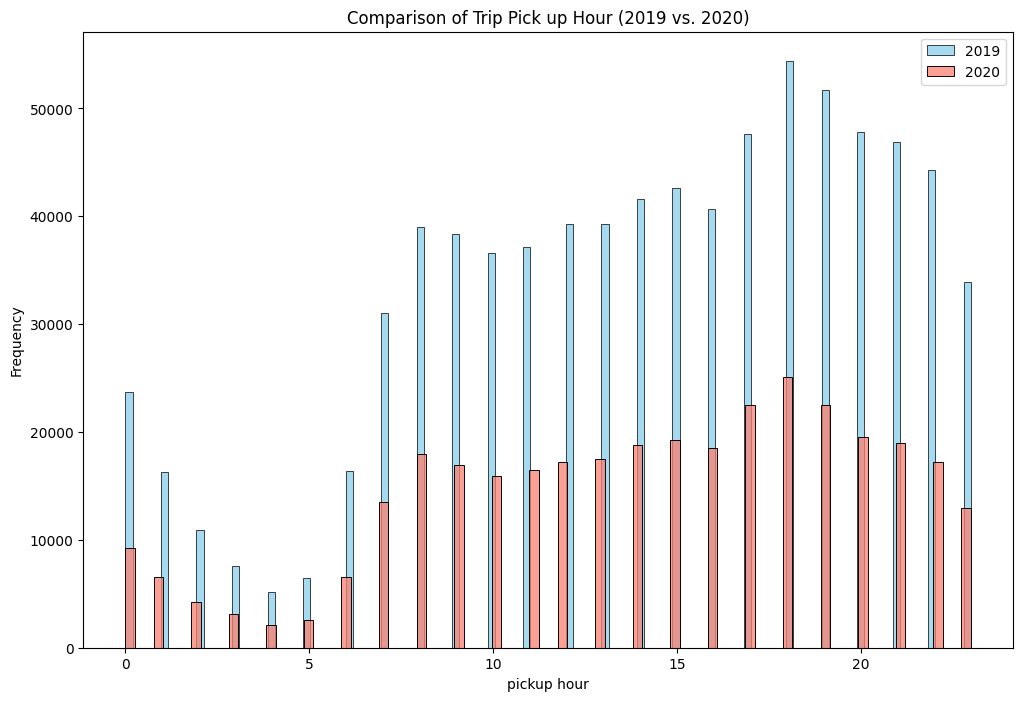

In [28]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram for 2019
sns.histplot(df[df['year']==2019]['pickup_hour'], color='skyblue', label='2019', ax=ax)

# Plot the histogram for 2020
sns.histplot(df[df['year']==2020]['pickup_hour'], color='salmon', label='2020', ax=ax)

ax.set_xlabel('pickup hour')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Trip Pick up Hour (2019 vs. 2020)')

ax.legend()
plt.show()

In [29]:
df[df['year']==2019]['pickup_hour'].value_counts().sort_index().to_list()

[23672,
 16297,
 10909,
 7605,
 5199,
 6491,
 16365,
 31033,
 39021,
 38360,
 36592,
 37184,
 39287,
 39318,
 41619,
 42588,
 40640,
 47636,
 54392,
 51669,
 47841,
 46875,
 44290,
 33952]

In [30]:
# Ahora necesitamos calcular un delta entre la cantidad de taxis tomados para cada hora
hour_list = list(range(24))
data = {
    'hour': hour_list,
    '2019': df[df['year']==2019]['pickup_hour'].value_counts().sort_index().to_list(),
    '2020': df[df['year']==2020]['pickup_hour'].value_counts().sort_index().to_list()
}


df_hour_data = pd.DataFrame(data)

df_hour_data['delta'] = ((df_hour_data['2020'] - df_hour_data['2019'])/df_hour_data['2019'])*100

df_hour_data

,hour,2019,2020,delta
0,0,23672,9249,-60.928523
1,1,16297,6546,-59.833098
2,2,10909,4279,-60.775506
3,3,7605,3088,-59.395135
4,4,5199,2091,-59.780727
5,5,6491,2595,-60.021568
6,6,16365,6544,-60.012221
7,7,31033,13465,-56.610705
8,8,39021,17989,-53.899182
9,9,38360,16906,-55.928050


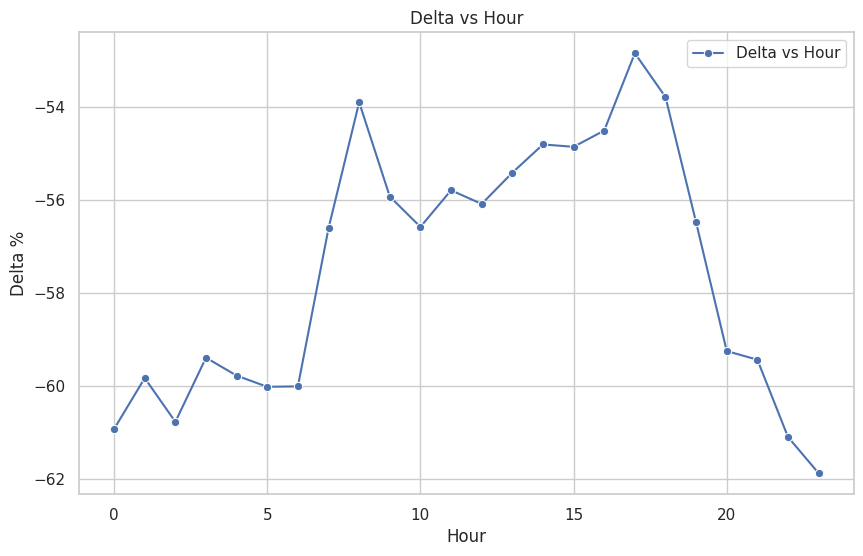

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='delta', data=df_hour_data, marker='o', color='b', label='Delta vs Hour')

# Set plot labels and title
plt.xlabel('Hour')
plt.ylabel('Delta %')
plt.title('Delta vs Hour')

# Show the plot
plt.show()

In [32]:
mean_day_delta = df_hour_data[df_hour_data['hour'].isin(range(7, 17))]['delta'].mean()

print(f"Mean delta on day hours: {mean_day_delta}")

mean_night_delta = df_hour_data[~df_hour_data['hour'].isin(range(7, 17))]['delta'].mean()

print(f"Mean delta on day hours: {mean_night_delta}")


Mean delta on day hours: -55.44862517070764
Mean delta on day hours: -58.966861527978985


Se puede concluir entonces, que la disminución en la cantidad de taxis tomados de 2019 a 2020 fue mayor durante la noche que durante el día, esto tiene sentido ya que las actividades nocturnas durante la pandemia fueron más restringidas que las diurnas. 